
Exercício de Casa 

Parte 1: Netflix


1 - Quantos usuários utilizam a Netflix pelo Tablet?


2 - Qual é a representatividade (em %) do sistema operacional(device) mais utilizado para assistir Netflix?


3 - Crie visualizações que responda as seguintes perguntas:
3.1 - Qual é o sistema operacional(device) mais usado para cada faixa etária? Existe algum padrão? O tipo de aparelho muda de acordo com o grupo de idade?


3 - Crie visualizações que responda as seguintes perguntas:
3.2 - No Brasil, qual é o sistema operacional mais utilizado?


In [123]:
# importando os pacotes que iremos utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# importando os dados da Netflix
df_netflix = pd.read_csv('../para-sala/dados/netflix.csv')
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [125]:
# convertendo o tipo de dados para data
df_netflix['Last Payment Date'] = pd.to_datetime(df_netflix['Last Payment Date'])
df_netflix['Join Date'] = pd.to_datetime(df_netflix['Join Date'])

In [126]:
# há quanto tempo as pessoas estão inscritas na Netflix?
df_netflix['duracao_assinatura'] = df_netflix['Last Payment Date'] - df_netflix['Join Date']
df_netflix['duracao_assinatura'] = df_netflix['duracao_assinatura'].dt.days
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,500
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,462
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,310
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,364


In [127]:
# vamos validar esses numeros?
df_netflix[(df_netflix['duracao_assinatura'] < 0)]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura
9,10,Premium,15,2023-07-01,2023-06-22,Italy,44,Female,Smart TV,1 Month,-9
14,15,Standard,12,2023-09-05,2023-06-28,Germany,38,Female,Smart TV,1 Month,-69
20,21,Premium,15,2023-10-06,2023-06-22,United States,26,Female,Laptop,1 Month,-106
34,35,Basic,10,2023-11-04,2023-06-28,Germany,39,Female,Smart TV,1 Month,-129
39,40,Basic,10,2023-07-03,2023-06-22,Italy,48,Male,Tablet,1 Month,-11
60,61,Premium,15,2023-08-02,2023-06-22,United States,28,Female,Laptop,1 Month,-41
69,70,Basic,10,2023-08-05,2023-06-22,Italy,41,Male,Smartphone,1 Month,-44
80,81,Premium,10,2023-11-01,2023-06-24,United States,37,Male,Tablet,1 Month,-130
108,109,Standard,13,2023-08-02,2023-06-25,Spain,35,Female,Tablet,1 Month,-38
129,130,Basic,14,2023-07-01,2023-06-23,Italy,43,Female,Tablet,1 Month,-8


In [128]:
# Encontramos valores inconsistentes, onde o dado não faz sentido. Como não possuímos contexto suficiente sobre essa tabela para entender
# o motivo de termos dt_ultimo_pagamento maior que dt_assinatura, iremos retirar essas linhas para não enviezar nossos resultados.
df_netflix = df_netflix.drop(df_netflix[df_netflix['duracao_assinatura'] < 0].index)
df_netflix = df_netflix.reset_index(drop=True)
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174
...,...,...,...,...,...,...,...,...,...,...,...
2482,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,500
2483,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,462
2484,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,310
2485,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,364


In [129]:
# Vamos criar intervalos de idade para entender melhor nossos usuários?
# Iremos criar categorias de idades com o intervalo de 4 em 4 anos.
# ou seja, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, +60

df_netflix.loc[df_netflix['Age'] < 25, 'grupo_idade'] = '20-24'
df_netflix.loc[(df_netflix['Age'] >= 25) & (df_netflix['Age'] < 30), 'grupo_idade'] = '25-29'
df_netflix.loc[(df_netflix['Age'] >= 30) & (df_netflix['Age'] < 35), 'grupo_idade'] = '30-34'
df_netflix.loc[(df_netflix['Age'] >= 35) & (df_netflix['Age'] < 40), 'grupo_idade'] = '35-39'
df_netflix.loc[(df_netflix['Age'] >= 40) & (df_netflix['Age'] < 45), 'grupo_idade'] = '40-44'
df_netflix.loc[(df_netflix['Age'] >= 45) & (df_netflix['Age'] < 50), 'grupo_idade'] = '45-49'
df_netflix.loc[(df_netflix['Age'] >= 50) & (df_netflix['Age'] < 55), 'grupo_idade'] = '50-54'
df_netflix.loc[(df_netflix['Age'] >= 55) & (df_netflix['Age'] < 60), 'grupo_idade'] = '55-59'
df_netflix.loc[df_netflix['Age'] >= 60, 'grupo_idade'] = '60+'
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura,grupo_idade
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629,25-29
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774,35-39
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,40-44
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262,50-54
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174,30-34
...,...,...,...,...,...,...,...,...,...,...,...,...
2482,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,500,25-29
2483,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,462,30-34
2484,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,310,35-39
2485,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,364,45-49


In [130]:
# com o grupo de idades feito, qual será a faixa etária mais recorrente?
df_netflix["grupo_idade"].value_counts()

35-39    512
30-34    502
40-44    496
45-49    496
25-29    304
50-54    177
Name: grupo_idade, dtype: int64

1 - Quantos usuários utilizam a Netflix pelo Tablet?

629 usuários utilizam a Netflix pelo Tablet.

In [131]:
df_netflix["Device"].value_counts()

Laptop        632
Tablet        629
Smartphone    619
Smart TV      607
Name: Device, dtype: int64

In [132]:
filtro_tablet = df_netflix["Device"] == 'Tablet'

print(f'{df_netflix[filtro_tablet].shape[0]} utilizam Netflix pelo Tablet')

629 utilizam Netflix pelo Tablet


2 - Qual é a representatividade (em %) do sistema operacional(device) mais utilizado para assistir Netflix?

No geral, os devices são bem equilibrados e por muito pouco (diferença de 3 pessoas entre o Laptop e o Tablet) o Laptop é o device mais utilizado com a representidade de 25,41%

In [133]:
df_netflix["Device"].value_counts(normalize=True)

Laptop        0.254121
Tablet        0.252915
Smartphone    0.248894
Smart TV      0.244069
Name: Device, dtype: float64

3 - Crie visualizações que responda as seguintes perguntas:

3.1 - Qual é o sistema operacional(device) mais usado para cada faixa etária? Existe algum padrão? O tipo de aparelho muda de acordo com o grupo de idade?

A distribuição do grupo de idade por devices apresentam uma semelhaça porém quando os grupos de idade 35-39 e 40-44 são os grupos que apresentação uma maior variância.  

O tipo de aparelho muda de acordo com o grupo de idade:

25-29 -> Tablet - 81/304

30-34 -> Smart TV - 135/502

35-39 -> Smartphone - 134/512

40-44 -> Laptop - 147/496

45-49 -> Smart TV - 131/496

50-54 -> Laptop - 48/177


In [134]:
df_devices_faixa = df_netflix[['Device','grupo_idade']]

In [135]:
agrupado = df_devices_faixa.groupby('grupo_idade')[['Device']].count()
agrupado

,Device
grupo_idade,
25-29,304
30-34,502
35-39,512
40-44,496
45-49,496
50-54,177


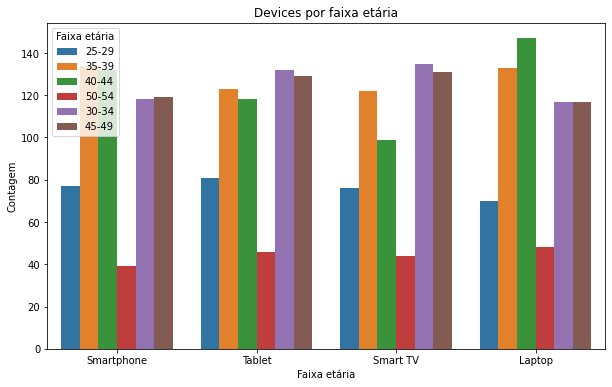

In [136]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os tipos de Devices

sns.countplot(data = df_netflix,
              x = 'Device',
              hue = 'grupo_idade')

# definir texto do título e eixos x e y

plt.title('Devices por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Faixa etária')

plt.show()

3 - Crie visualizações que responda as seguintes perguntas:

3.2 - No Brasil, qual é o sistema operacional mais utilizado?

O sistema operacional (Device) mais utilizado no Brasil é o Smartphone com 55 usuários e uma participaçao de 30,05%

In [137]:
df_analise = df_netflix['Country'] == 'Brazil'
df_netflix_brazil = df_netflix[df_analise]
df_netflix_brazil

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura,grupo_idade
6,7,Standard,12,2021-09-12,2023-06-25,Brazil,46,Male,Tablet,1 Month,651,45-49
14,17,Basic,10,2022-01-24,2023-06-25,Brazil,30,Female,Laptop,1 Month,517,30-34
23,27,Basic,10,2022-08-29,2023-06-25,Brazil,47,Female,Smart TV,1 Month,300,45-49
32,37,Basic,10,2022-09-14,2023-06-25,Brazil,45,Female,Laptop,1 Month,284,45-49
41,47,Basic,10,2022-05-10,2023-06-25,Brazil,39,Female,Smart TV,1 Month,411,35-39
...,...,...,...,...,...,...,...,...,...,...,...,...
2418,2432,Basic,11,2022-08-19,2023-07-14,Brazil,28,Female,Tablet,1 Month,329,25-29
2433,2447,Basic,14,2022-10-21,2023-12-07,Brazil,27,Male,Tablet,1 Month,412,25-29
2448,2462,Basic,11,2022-11-13,2023-07-13,Brazil,40,Female,Smart TV,1 Month,242,40-44
2463,2477,Premium,12,2022-08-30,2023-12-07,Brazil,40,Male,Laptop,1 Month,464,40-44


In [138]:
df_netflix_brazil['Device'].value_counts()

Smartphone    55
Tablet        44
Laptop        44
Smart TV      40
Name: Device, dtype: int64

In [139]:
df_netflix_brazil['Device'].value_counts(normalize=True)

Smartphone    0.300546
Tablet        0.240437
Laptop        0.240437
Smart TV      0.218579
Name: Device, dtype: float64

In [ ]:
# definir tamanho da figura
plt.figure(figsize=(8, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os Devices
sns.countplot(data = df_netflix_brazil,
              x = 'Device')

# definir texto do título e eixos x e y
plt.title('Device mais Utilizado no Brasil')
plt.xlabel('Devices')
plt.ylabel('Qtd de Usuarios')

plt.show()